In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [26]:
numericals_df = pd.read_csv('numericals_df.csv')
categorical_df = pd.read_csv('categorical_df.csv')

In [27]:
data = pd.concat((numericals_df, categorical_df), axis=1)
data = data.drop(['Unnamed: 0'], axis = 1)
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate,Corporate L3,OfferA,Agent,Two-Door Car,Medsize
1,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,Arizona,No,...,Unemployed,F,Suburban,Single,Personal,Personal L3,OfferC,Agent,Four-Door Car,Medsize
2,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,Nevada,No,...,Employed,F,Suburban,Married,Personal,Personal L3,OfferA,Agent,Two-Door Car,Medsize
3,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,California,No,...,Unemployed,M,Suburban,Married,Corporate,Corporate L2,OfferA,Call Center,SUV,Medsize
4,8256.297800,62902.0,69.0,14.0,94.0,0.0,2.0,159.383042,Washington,No,...,Employed,M,Rural,Single,Personal,Personal L1,OfferA,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,No,...,Employed,M,Urban,Married,Personal,Personal L1,OfferB,Web,Four-Door Car,Medsize
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,Yes,...,Employed,F,Suburban,Divorced,Corporate,Corporate L3,OfferA,Branch,Four-Door Car,Medsize
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,No,...,Unemployed,M,Suburban,Single,Corporate,Corporate L2,OfferA,Branch,Four-Door Car,Medsize
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,No,...,Employed,M,Suburban,Married,Personal,Personal L2,OfferC,Branch,Four-Door Car,Large


In [28]:
data.isna().sum()/len(data)

customer_lifetime_value          0.140902
income                           0.140902
monthly_premium_auto             0.140902
months_since_last_claim          0.140902
months_since_policy_inception    0.140902
number_of_open_complaints        0.140902
number_of_policies               0.140902
total_claim_amount               0.140902
state                            0.000000
response                         0.000000
coverage                         0.000000
education                        0.000000
effective_to_date                0.000000
employmentstatus                 0.000000
gender                           0.000000
location_code                    0.000000
marital_status                   0.000000
policy_type                      0.000000
policy                           0.000000
renew_offer_type                 0.000000
sales_channel                    0.000000
vehicle_class                    0.000000
vehicle_size                     0.000000
dtype: float64

In [29]:
data1 = data.fillna(data.mean())
display(data1.shape)
data1.isna().sum()/len(data1)



(9134, 23)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
marital_status                   0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [30]:
data2 = data.dropna(axis = 0)
display(data2)
data2.isna().sum()/len(data2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate,Corporate L3,OfferA,Agent,Two-Door Car,Medsize
1,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,Arizona,No,...,Unemployed,F,Suburban,Single,Personal,Personal L3,OfferC,Agent,Four-Door Car,Medsize
2,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,Nevada,No,...,Employed,F,Suburban,Married,Personal,Personal L3,OfferA,Agent,Two-Door Car,Medsize
3,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,California,No,...,Unemployed,M,Suburban,Married,Corporate,Corporate L2,OfferA,Call Center,SUV,Medsize
4,8256.297800,62902.0,69.0,14.0,94.0,0.0,2.0,159.383042,Washington,No,...,Employed,M,Rural,Single,Personal,Personal L1,OfferA,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,4100.398533,47761.0,104.0,16.0,58.0,0.0,1.0,541.282007,Oregon,No,...,Unemployed,F,Suburban,Single,Corporate,Corporate L2,OfferD,Call Center,Four-Door Car,Medsize
7843,3096.511217,21604.0,79.0,14.0,28.0,0.0,1.0,379.200000,California,Yes,...,Employed,M,Urban,Married,Personal,Personal L3,OfferB,Agent,premium,Medsize
7844,8163.890428,0.0,85.0,9.0,37.0,3.0,2.0,790.784983,Arizona,No,...,Employed,F,Urban,Single,Personal,Personal L3,OfferB,Branch,Four-Door Car,Large
7845,7524.442436,21941.0,96.0,34.0,3.0,0.0,3.0,691.200000,Oregon,No,...,Unemployed,M,Suburban,Married,Special,Special L1,OfferA,Web,SUV,Medsize


customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
marital_status                   0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In this final lab, we will model our data. Import sklearn train_test_split and split the data.

In [31]:
X = data2.drop(['total_claim_amount', 'effective_to_date', 'policy'], axis = 1)
y = data2[['total_claim_amount']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)


In [32]:
num_train = X_train.select_dtypes(np.number)
num_test = X_test.select_dtypes(np.number)

cat_train = X_train.select_dtypes(object)
cat_test = X_test.select_dtypes(object)
display(cat_train.shape)
display(cat_train.head(0))

(6277, 13)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size


In [33]:
from sklearn.preprocessing import MinMaxScaler


transformer = MinMaxScaler().fit(num_train)
X_train_norm = transformer.transform(num_train)
X_test_norm = transformer.transform(num_test)


X_train_norm_df = pd.DataFrame(X_train_norm, columns = num_train.columns)
X_test_norm_df = pd.DataFrame(X_test_norm, columns = num_test.columns)


# 5.Encoding 
One hot | state



One hot | marital status

One hot | policy type

One hot | policy

One hot | renew offercustomer_df

One hot | sales channel

One hot | vehicle class

Ordinal | vehicle size

Ordinal | coverage

Ordinal | employmentstatus

Ordinal | location code

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [35]:
col_o = ["coverage","employmentstatus","location_code","vehicle_size"]
col_1 = ["state","marital_status","policy_type","renew_offer_type","sales_channel","vehicle_class"]

cat_ordinal_train = pd.DataFrame(cat_train, columns = col_o)
cat_ordinal_test = pd.DataFrame(cat_test, columns = col_o)
cat_onehot_train = pd.DataFrame(cat_train, columns = col_1)
cat_onehot_test = pd.DataFrame(cat_test, columns = col_1)


Ordinal encoder

In [36]:
ord_encoder = OrdinalEncoder().fit(cat_ordinal_train)
ordinal_train_encoded = ord_encoder.transform(cat_ordinal_train)
ordinal_test_encoded = ord_encoder.transform(cat_ordinal_test)

ordinal_train_encoded_df = pd.DataFrame(ordinal_train_encoded, columns = col_o)
ordinal_test_encoded_df = pd.DataFrame(ordinal_test_encoded, columns = col_o)


OneHotEncoder

In [37]:
encoder = OneHotEncoder(handle_unknown = 'error', drop = 'first').fit(cat_onehot_train)
onehot_train_encoded = encoder.transform(cat_onehot_train).toarray()
onehot_test_encoded = encoder.transform(cat_onehot_test).toarray()

cols = encoder.get_feature_names(input_features = cat_onehot_train.columns)

onehot_train_encoded_df = pd.DataFrame(onehot_train_encoded, columns = cols)
onehot_test_encoded_df = pd.DataFrame(onehot_test_encoded, columns = cols)


The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [38]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce') 
data[['effective_to_date']]

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03
...,...
9129,2011-02-10
9130,2011-02-12
9131,2011-02-06
9132,2011-02-03


<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

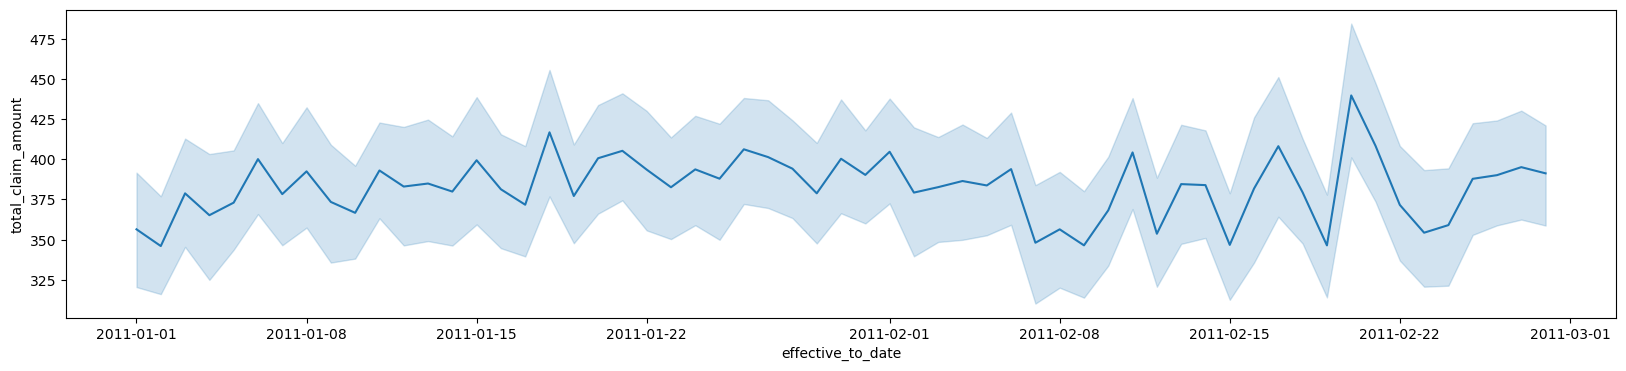

In [56]:
plt.figure(figsize=(20,4))
sns.lineplot(data = data, x = "effective_to_date", y = 'total_claim_amount', markers = True)

In [39]:

data['week'] =  data['effective_to_date'].dt.isocalendar().week
data['day'] =  data['effective_to_date'].dt.isocalendar().day
data['month'] =  data['effective_to_date'].dt.month
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,week,day,month
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,Washington,No,...,Married,Corporate,Corporate L3,OfferA,Agent,Two-Door Car,Medsize,8,4,2
1,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,Arizona,No,...,Single,Personal,Personal L3,OfferC,Agent,Four-Door Car,Medsize,5,1,1
2,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,Nevada,No,...,Married,Personal,Personal L3,OfferA,Agent,Two-Door Car,Medsize,7,6,2
3,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,California,No,...,Married,Corporate,Corporate L2,OfferA,Call Center,SUV,Medsize,3,4,1
4,8256.297800,62902.0,69.0,14.0,94.0,0.0,2.0,159.383042,Washington,No,...,Single,Personal,Personal L1,OfferA,Agent,Four-Door Car,Medsize,5,4,2


We are going to concatenate.

In [40]:
cat_train_processed = np.concatenate((onehot_train_encoded, ordinal_train_encoded), axis = 1)
cat_test_processed = np.concatenate((onehot_test_encoded, ordinal_test_encoded), axis = 1)

# cat_train_process = pd.concat([onehot_train_encoded_df, ordinal_train_encoded_df], axis = 1)
# cat_test_process = pd.concat([onehot_train_encoded_df, ordinal_train_encoded_df], axis =1)

In [61]:
X_train_processed = np.concatenate((X_train_norm, cat_train_processed),axis=1)
X_test_processed = np.concatenate((X_test_norm, cat_test_processed),axis=1)

# X_train_process = pd.concat([cat_train_processed, X_train_norm_df], axis = 1)
# X_test_process = pd.concat([cat_test_processed, X_test_norm_df], axis = 1)


regression test and function building.

In [42]:
from sklearn import linear_model
from sklearn.metrics import r2_score


linreg = linear_model.LinearRegression()
linreg.fit(X_train_processed,y_train)

LinearRegression()

In [43]:
predictions = linreg.predict(X_train_processed)
print(r2_score(y_train, predictions))

predictions_test = linreg.predict(X_test_processed)
print(r2_score(y_test, predictions_test))

0.3475244619767047
0.3720204496672336


Logistic regression test

In [57]:
# from sklearn.preprocessing import StandardScaler

# transformer1 = StandardScaler().fit(X_train)
# X_train_scaled = pd.DataFrame(transformer1.transform(X_train),columns=X.columns)
# X_test_scaled = pd.DataFrame(transformer1.transform(X_test),columns=X.columns)



ValueError: could not convert string to float: 'Nevada'

In [58]:
# from sklearn.linear_model import LogisticRegression

# LogReg = LogisticRegression(random_state=0, solver='lbfgs')
# LogReg.fit(X_train_processed, y_train)
# LogReg.score(X_test_processed, y_test)

ValueError: Unknown label type: 'continuous'

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [49]:
def make_models_and_get_scores(x_train, x_test, y_train, y_test):
    model = []
    train = []
    test = []
    test_result = pd.DataFrame()

    KNN = KNeighborsRegressor(n_neighbors = 5, weights= 'uniform', p = 1)
    KNN.fit(x_train, y_train)
    model.append("K-Neighbors")
    KNN_R2_score_train = KNN.score(x_train, y_train)
    train.append(KNN_R2_score_train)
    KNN_R2_score_test = KNN.score(x_test, y_test)
    test.append(KNN_R2_score_test)
    

    linreg = linear_model.LinearRegression()
    linreg.fit(x_train,y_train)
    model.append("Linear Regression")
    linreg_predictions_train = linreg.predict(x_train)
    linreg_R2_score_train = r2_score(y_train, linreg_predictions_train)
    train.append(linreg_R2_score_train)
    linreg_predictions_test = linreg.predict(x_test)
    linreg_R2_score_test = r2_score(y_test, linreg_predictions_test)
    test.append(linreg_R2_score_test)

    regr = MLPRegressor(random_state = 8, max_iter = 500).fit(x_train, y_train)
    model.append("MLP Regressor")
    mlp_score_train = regr.score(x_train, y_train)
    train.append(mlp_score_train)
    mlp_score_test = regr.score(x_test, y_test)
    test.append(mlp_score_test)
    

    test_result["model"] = model
    test_result["r2_train"] = train
    test_result["r2_test"] = test

    return test_result

running the function

In [50]:
scores = make_models_and_get_scores(X_train_processed, X_test_processed, y_train, y_test)
scores

,model,r2_train,r2_test
0,K-Neighbors,0.335331,0.027103
1,Linear Regression,0.347524,0.372020
2,MLP Regressor,0.381564,0.388235


## conclusion 

first some observations: 

Our K-neighbors is not suited for our data as the scores are not reliable on the test score.

when we use the 'distance' weights in the KNN we end up with a r2 score of 1, meaning it is overfitted.

we also display low score on all models , we ca n infer that we have issues with our data (numericals in particular with the dealing of outliers)

Our 'best' results came from the MLP regressor, the neural network model seems to be wel suited to have the best predictions in our case.

The 'problem' we can observe here is the lengh of the processing of the MLP compares to the others, sometimes it can not be feasable to use it.


